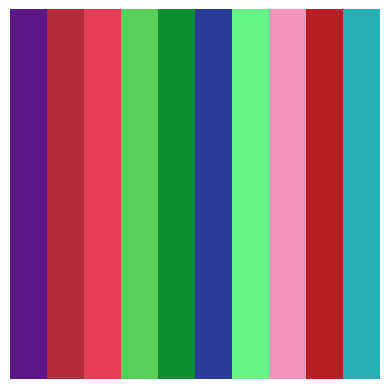

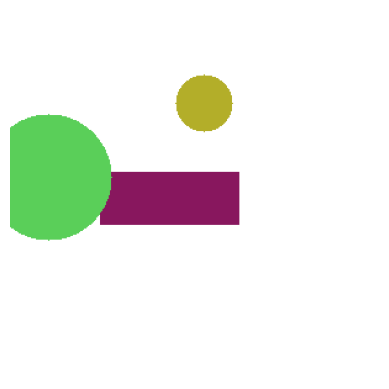

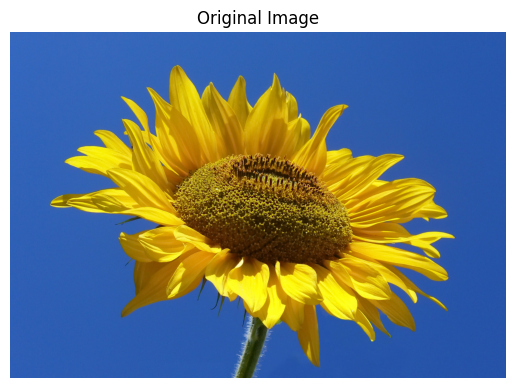

<ipython-input-7-db445c2eab3c>:70: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  scaled_image = transform.rescale(image, scale=4, multichannel=True)


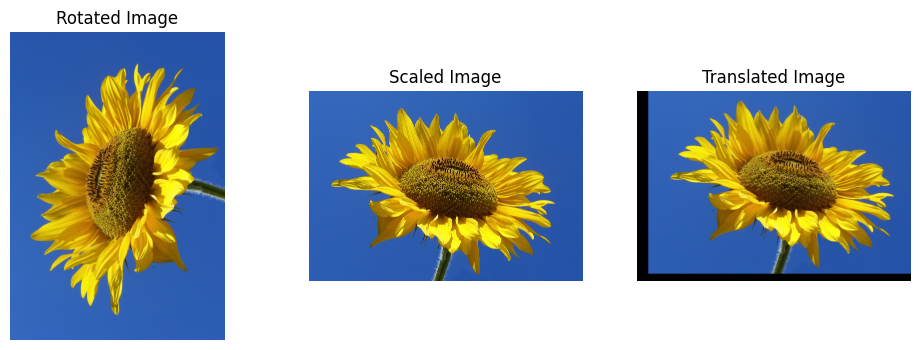

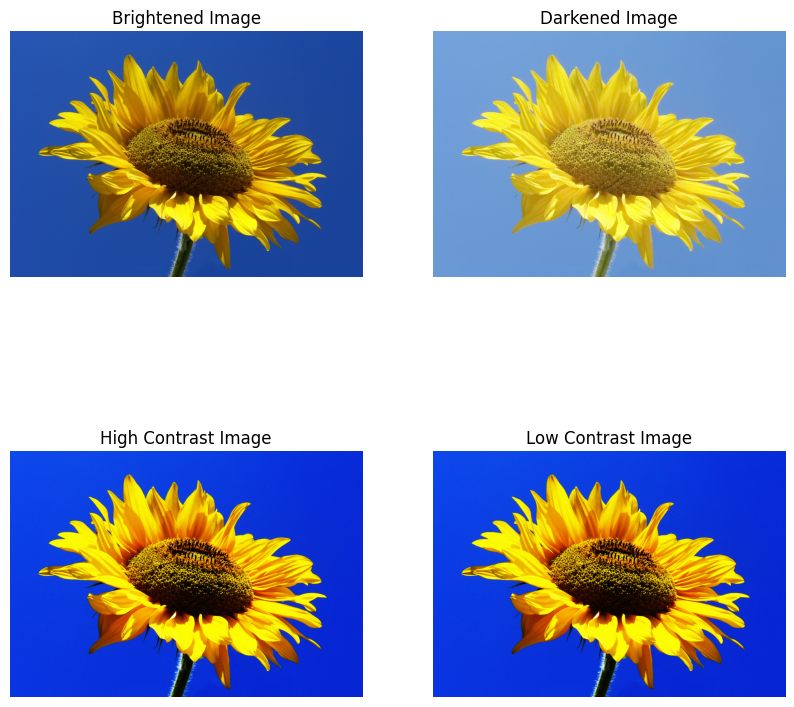

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Phase 1: Color Palette Generator
def generate_color_palette():
    colors = np.random.rand(10, 3)  # Generate 10 random RGB colors
    return colors

def display_color_palette(colors):
    palette = np.zeros((100, 100, 3))  # Initialize canvas for palette
    for i in range(10):
        palette[:, i * 10:(i + 1) * 10] = colors[i]  # Map each color to a section of the canvas

    plt.imshow(palette)
    plt.axis('off')
    plt.show()

# Example usage:
colors = generate_color_palette()
display_color_palette(colors)

# Phase 2: Shape Drawing on an Empty Image Canvas
def draw_random_shapes(image_size, num_shapes):
    image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255  # Initialize white image

    for _ in range(num_shapes):
        shape_type = np.random.randint(3)  # Randomly choose shape type (0: rectangle, 1: circle, 2: ellipse)
        color_index = np.random.randint(10)  # Randomly choose a color from the palette
        color = tuple(int(val * 255) for val in colors[color_index])  # Convert RGB to BGR

        if shape_type == 0:
            pt1 = (np.random.randint(image_size), np.random.randint(image_size))
            pt2 = (np.random.randint(image_size), np.random.randint(image_size))
            cv2.rectangle(image, pt1, pt2, color, -1)  # Fill rectangle
        elif shape_type == 1:
            center = (np.random.randint(image_size), np.random.randint(image_size))
            radius = np.random.randint(5, min(image_size // 4, image_size // 2))  # Limit radius
            cv2.circle(image, center, radius, color, -1)  # Fill circle
        elif shape_type == 2:
            center = (np.random.randint(image_size), np.random.randint(image_size))
            axes = (np.random.randint(5, min(image_size // 4, image_size // 2)), np.random.randint(5, min(image_size // 4, image_size // 2)))
            angle = np.random.randint(360)  # Random rotation angle
            cv2.ellipse(image, center, axes, angle, 0, 360, color, -1)  # Fill ellipse

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage:
draw_random_shapes(300, 3)

from skimage import io, transform, exposure

# Load the image
image_path = '/content/media_a1.jpg'
image = io.imread(image_path)

# Display the original image
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Affine transformations
# Rotate the image by 90 degrees counterclockwise
rotated_image = transform.rotate(image, 90, resize=True)

# Scale the image using a scalar factor 4
scaled_image = transform.rescale(image, scale=4, multichannel=True)

# Translate the image by [-100, 65] pixels
translated_image = transform.warp(image, transform.AffineTransform(translation=(-100, 65)))

# Display the transformed images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(rotated_image)
axes[0].axis('off')
axes[0].set_title('Rotated Image')

axes[1].imshow(scaled_image)
axes[1].axis('off')
axes[1].set_title('Scaled Image')

axes[2].imshow(translated_image)
axes[2].axis('off')
axes[2].set_title('Translated Image')

plt.show()

# Pixel-processing applications
# Increase the brightness of the image by 50
brightened_image = exposure.adjust_gamma(image, gamma=1.2)

# Decrease the brightness of the image by half
darkened_image = exposure.adjust_gamma(image, gamma=0.5)

# Increase the contrast
high_contrast_image = exposure.adjust_sigmoid(image)

# Decrease the contrast
low_contrast_image = exposure.adjust_sigmoid(image, gain=10, cutoff=0.5)

# Display the processed images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(brightened_image)
axes[0, 0].axis('off')
axes[0, 0].set_title('Brightened Image')

axes[0, 1].imshow(darkened_image)
axes[0, 1].axis('off')
axes[0, 1].set_title('Darkened Image')

axes[1, 0].imshow(high_contrast_image)
axes[1, 0].axis('off')
axes[1, 0].set_title('High Contrast Image')

axes[1, 1].imshow(low_contrast_image)
axes[1, 1].axis('off')
axes[1, 1].set_title('Low Contrast Image')

plt.show()




